In [25]:
import numpy as np

from pysim.experiments.utility.rfid_helper import(
    calculate_probs, generation_interval, plot_probs
)
from pysim.models.rfid.params import default_params, inner_params, KMPH_TO_MPS_MUL
from pysim.experiments.utility.channel_helper import(
    find_zones, get_tag_rx
)
from pysim.experiments.utility.rfid_helper import generation_interval

In [26]:
# Переменная по оси абсцисс
# altitudes = np.arange(0.5, 7.5, 0.5)
altitudes = (1,2, 3, 4, 5, 6, 7)
# Параметры для разных кривых
offset_params = [
    {'reader_offset': 1},
    {'reader_offset': 2},
    {'reader_offset': 3},
]

# Каждый словарь в list - это набор входных данных для одной кривой
altitude_params_list = []
for offset_params_item in offset_params:
    altitude_params_list.append({
        'tari': default_params.tari,
        'encoding': default_params.encoding,
        'tid_word_size': default_params.tid_word_size,
        'power': default_params.power_dbm,
        # 'num_tags': default_params.num_tags,
        'num_tags': 75,
        'speed': default_params.speed,
        'reader_offset': offset_params_item['reader_offset'],
        'tag_offset': default_params.tag_offset,
        'useadjust': default_params.useadjust,
        "generation_interval": (generation_interval, 1),
        'q': 0 # default_params.q,
    })

In [27]:
key_name = lambda params: f"Расстояние от стены = {params['reader_offset']} м"

_, time_altitude_results = calculate_probs(
    variable="altitude",
    variable_values=altitudes,
    params_list=altitude_params_list,
    key_fn=key_name,
    use_json=False,
    save_results=False,
    json_directory="test",
    file_name='altitude.json'
)

Моделирование по переменной altitude: 100%|██████████| 3/3 [00:14<00:00,  4.90s/it]


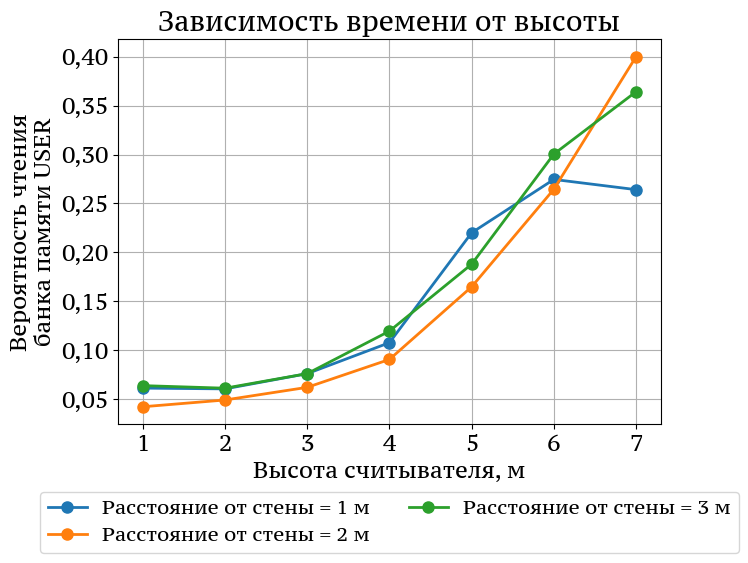

In [29]:
plot_probs(
    results_list=[time_altitude_results],
    labels_list=[key_name(params) for params in offset_params],
    titles=["Зависимость времени от высоты"],
    x_variable=altitudes,
    x_label="Высота считывателя, м",
    image_name="Altitude probs",
    save_fig=False,
    image_directory="",
)